Final Project Submission,
    
Please fill out:
    
* Student name: **Loyce Ngani Tsuma**
    
* Student pace: **Hybrid**
    
* Scheduled project review date/time:14/6/2024 11.59pm 
    
* Instructor name: **Antonny Muiko**
    
* Blog post URL:TBA

# Unites States Aviation Accident Analysis

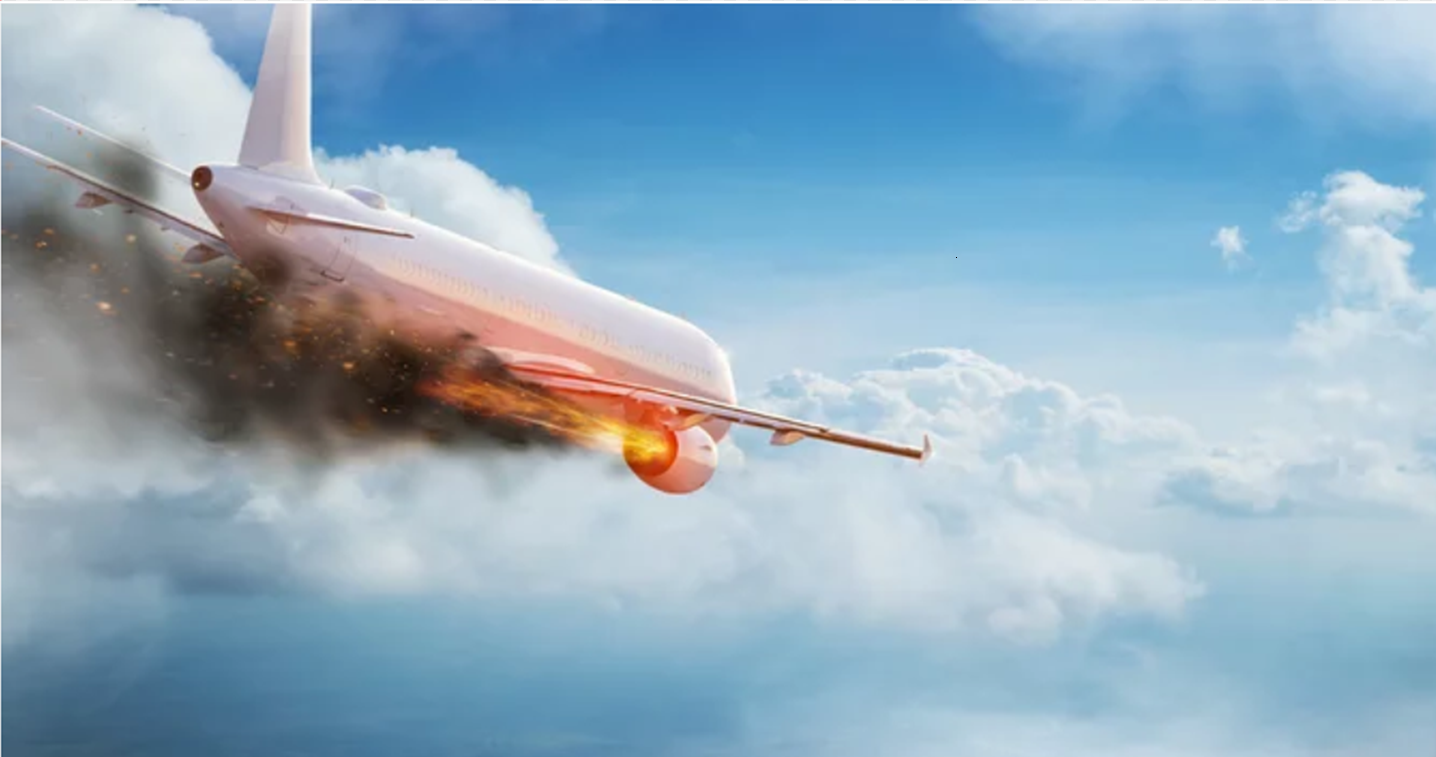

In [56]:
from IPython.display import Image
Image(filename=r"C:\Users\FLEX 5\Pictures\Screenshots\Screenshot 2024-06-14 114245.png", width=10000, height=300)


## Overview

The aviation industry faces significant safety risks, and understanding the causes and patterns of accidents is crucial for reducing the likelihood of future incidents. By analyzing historical data on aviation accidents, we can identify common factors and trends that contribute to accidents, enabling the development of targeted safety initiatives to mitigate these risks that lead to loss of lives and financial loss.

### The Data

The dataset from the National Transportation Safety Board which contains information on civil aviation accidents and selected incidents in the United States and international waters from 1962 to 2023. The data includes various features such as the probable cause of the `accident`, `location`, `date` and `details on the aircraft involved.`

In [57]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Converting the file into a pd data frame
aviation = '../dsc-phase-1-project-v3/data/Aviation_Data.csv'
df = pd.read_csv(aviation, engine = 'python')

In [59]:
contigency_dataset = df.copy()# copying original data set before cleaning

## Exploring the Data

In [60]:
#Get an Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [61]:
df.shape


(90348, 31)

In [62]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [63]:
#identifying null values

df.isnull().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: i

In [64]:
#checking for duplicates

df.duplicated().sum()

1390

### Data Cleaning

In [65]:
#Drop duplicated items in a column
df = df.drop_duplicates(subset=['Accident.Number'])

In [66]:
#Dropping Unecessary Columns

df.drop(columns = ['Latitude','Longitude','FAR.Description','Investigation.Type','Airport.Code',
    'Amateur.Built','Engine.Type','Schedule'],inplace = True )

In [67]:
#Drop rows where 'Country' is not 'United States' and modify the original DataFrame
    
df = df[df['Country'] == 'United States']
   

In [68]:
#Convert 'Event.Date' column to Date Time Format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

In [69]:
#Remove '.' and capitalize the next letter in column names
    
df = df.rename(columns={col: col.replace('.', ' ').replace(col[col.find('.')+1], col[col.find('.')+1].upper()) for col in df.columns})

In [70]:
df.columns

Index(['Event Id', 'Accident Number', 'Event Date', 'Location', 'Country',
       'Airport Name', 'Injury Severity', 'Aircraft Damage',
       'Aircraft Category', 'Registration Number', 'Make', 'Model',
       'Number Of Engines', 'PurpOse Of flight', 'Air Carrier',
       'Total Fatal Injuries', 'Total Serious Injuries',
       'Total Minor Injuries', 'Total Uninjured', 'Weather Condition',
       'Broad Phase of flight', 'Report Status', 'Publication Date'],
      dtype='object')

In [71]:
#converting column values into title case
df['Make'] = df['Make'].str.title()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82230 entries, 0 to 90347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event Id                82230 non-null  object        
 1   Accident Number         82230 non-null  object        
 2   Event Date              82230 non-null  datetime64[ns]
 3   Location                82219 non-null  object        
 4   Country                 82230 non-null  object        
 5   Airport Name            51556 non-null  object        
 6   Injury Severity         82125 non-null  object        
 7   Aircraft Damage         80253 non-null  object        
 8   Aircraft Category       28137 non-null  object        
 9   Registration Number     82114 non-null  object        
 10  Make                    82209 non-null  object        
 11  Model                   82192 non-null  object        
 12  Number Of Engines       80357 non-null  float64    

In [73]:
#Keep only the rows with at least 18 non-null values
df = df.dropna(thresh=18)

In [74]:
df.shape

(78579, 23)

In [75]:
#final analysis on cleaned data
df.describe()

,Event Date,Number Of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured
count,78579,77026.000000,70341.000000,70201.000000,70801.00000,75240.000000
mean,1998-08-25 08:41:17.242011136,1.132890,0.395800,0.250937,0.32508,3.942424
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1988-03-29 00:00:00,1.000000,0.000000,0.000000,0.00000,0.000000
50%,1996-07-24 00:00:00,1.000000,0.000000,0.000000,0.00000,1.000000
75%,2008-07-28 00:00:00,1.000000,0.000000,0.000000,0.00000,2.000000
max,2022-12-26 00:00:00,8.000000,230.000000,137.000000,125.00000,699.000000
std,NaN,0.423027,2.172454,1.145059,1.30515,22.516708


In [76]:
# Count accidents by cause and creating another dataset accident_causes_counts
    
# Filter the DataFrame for rows where 'Report Status' contains 'pilot',Other Crew,Engine Failure,Weather,Runway Condition and manufacturer defects
accident_causes_pilot = df[df['Report Status'].str.contains('pilot', case=False, na=False)]
accident_causes_crew = df[df['Report Status'].str.contains('crew', case=False, na=False)]
accident_causes_engine= df[df['Report Status'].str.contains('engine', case=False, na=False)]
accident_causes_weather= df[df['Report Status'].str.contains('weather', case=False, na=False)]
accident_causes_runway= df[df['Report Status'].str.contains('runway', case=False, na=False)]
accident_causes_manufacturer= df[df['Report Status'].str.contains('manufacturer', case=False, na=False)]
accident_causes_probable= df[df['Report Status'].str.contains('Probable', case=False, na=False)]
accident_causes_foreign= df[df['Report Status'].str.contains('Foreign', case=False, na=False)]
accident_causes_factual= df[df['Report Status'].str.contains('Factual', case=False, na=False)]

# Count the occurrences of each 'Report Status'
accident_causes_pilot_counts = accident_causes_pilot['Report Status'].value_counts()
accident_causes_crew_counts = accident_causes_crew['Report Status'].value_counts()
accident_causes_engine_counts = accident_causes_engine['Report Status'].value_counts()
accident_causes_weather_counts= accident_causes_weather['Report Status'].value_counts()
accident_causes_runway_counts= accident_causes_runway['Report Status'].value_counts()
accident_causes_manufacturer_counts= accident_causes_manufacturer['Report Status'].value_counts()
accident_causes_probable_counts = accident_causes_probable['Report Status'].value_counts()
accident_causes_foreign_counts = accident_causes_foreign['Report Status'].value_counts()
accident_causes_factual_counts = accident_causes_factual['Report Status'].value_counts()
    

In [77]:
# Combine the counts into a single DataFrame
accident_causes_counts =accident_causes_counts = pd.DataFrame({
    'pilot': accident_causes_pilot_counts,
    'crew': accident_causes_crew_counts,
    'engine': accident_causes_engine_counts,
    'weather': accident_causes_weather_counts,
    'runway': accident_causes_runway_counts,
    'manufacturer': accident_causes_manufacturer_counts,
    'probable': accident_causes_probable_counts,
    'foreign': accident_causes_foreign_counts,
    'factual': accident_causes_factual_counts
}).fillna(0).astype(int) 

# Reset index to have a clean DataFrame\n",
accident_causes_counts = accident_causes_counts.reset_index().rename(columns={'index': 'Report Status'})

accident_causes_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14849 entries, 0 to 14848
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Report Status  14849 non-null  object
 1   pilot          14849 non-null  int32 
 2   crew           14849 non-null  int32 
 3   engine         14849 non-null  int32 
 4   weather        14849 non-null  int32 
 5   runway         14849 non-null  int32 
 6   manufacturer   14849 non-null  int32 
 7   probable       14849 non-null  int32 
 8   foreign        14849 non-null  int32 
 9   factual        14849 non-null  int32 
dtypes: int32(9), object(1)
memory usage: 638.2+ KB


### Summary of Statistics

Here are the key insights from the final analysis on the cleaned data:**df**

The distinct column(unique identifier) in this dataframe is the `Event Id`

The dataset now contains `80,357` rows after removing duplicates, incomplete cases, and other cleaning steps.
    
Another data set has been created **accident_causes_counts** this will be used to visualize causal accident trends

In [78]:
# Saving cleaned data to csv(for Tableau visualization later)
df.to_csv('cleaned_aviation.csv',index = False)
accident_causes_counts.to_csv('accident_causes.csv',index = False)

## Time Series Analysis

## Accident Trends by Year and Month
This can help identify if accidents are increasing, decreasing, or staying constant

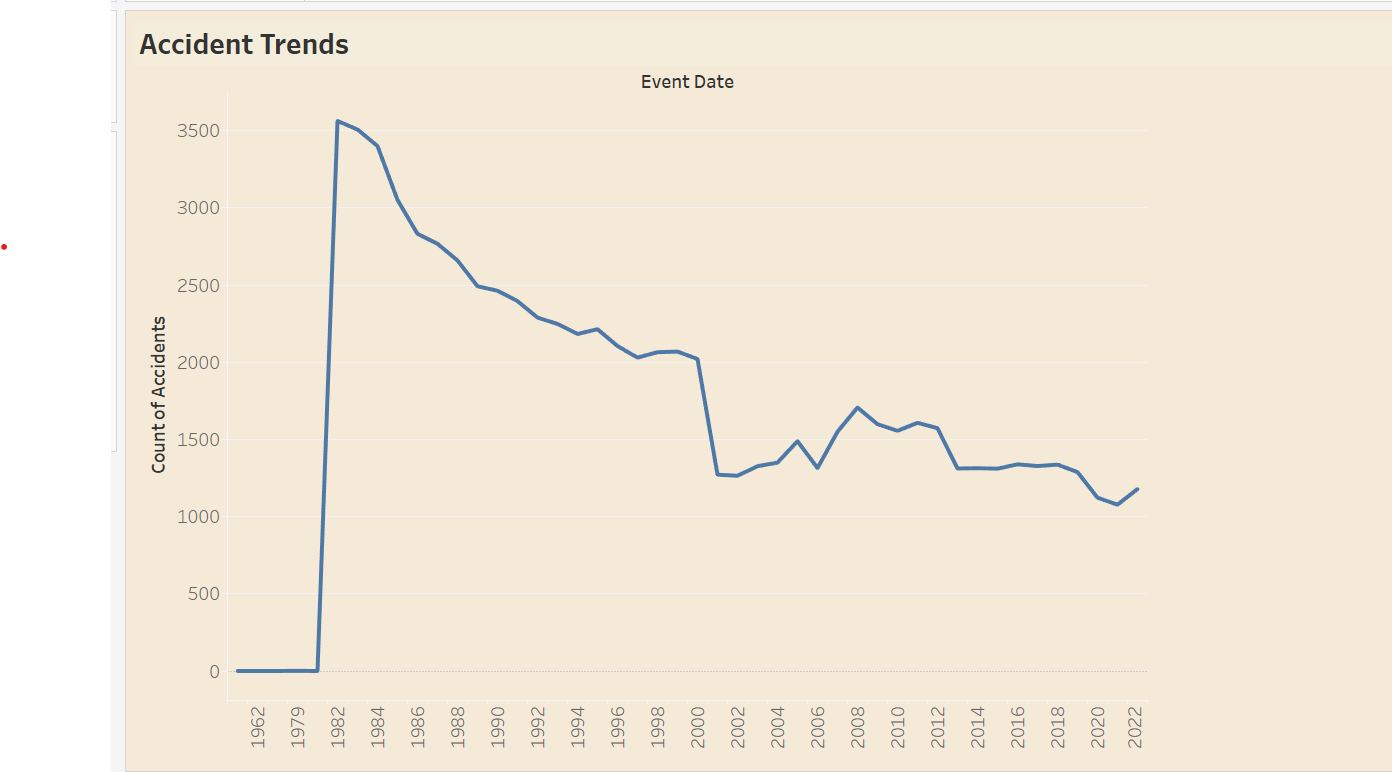

In [79]:
Image(filename=r"C:\\Users\\FLEX 5\\Pictures\\Screenshots\\year trend.png", width=800, height=300)

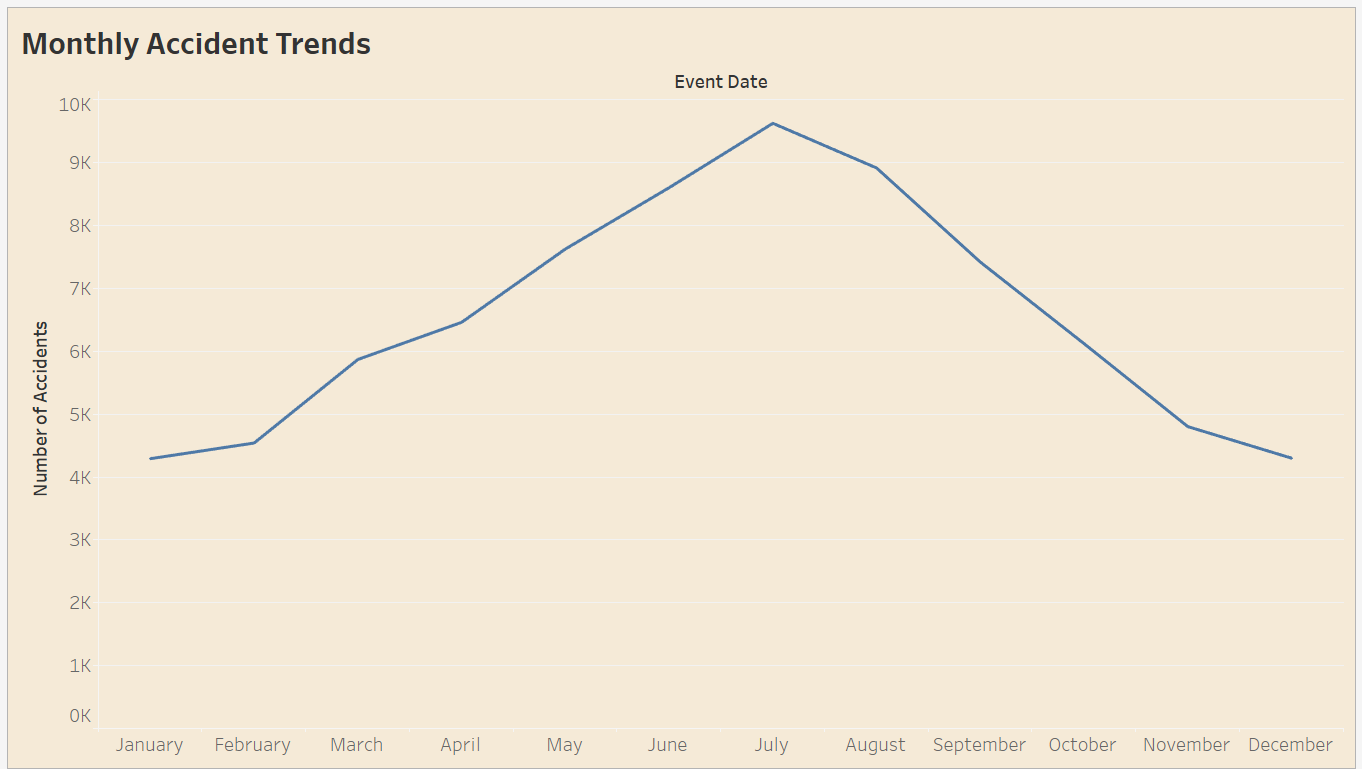

In [80]:
Image(filename=r"C:\\Users\\FLEX 5\\Pictures\\Screenshots\\month trends.png", width=800, height=300)

## Accident Trends Over Time

- This trend suggests significant improvements in aviation safety over the decades, likely due to advancements in technology, stricter safety regulations, enhanced pilot training, and overall better industry practices.
- July is a month to watch this could be attributed to the number of travels experienced as July is the beginning of Summer season

## Aircraft Damage Frequency Values

Let's analyze the categorical variables like `Aircraft Damage`and`Aircraft Category`

This will give us the values showing the frequency of each category.

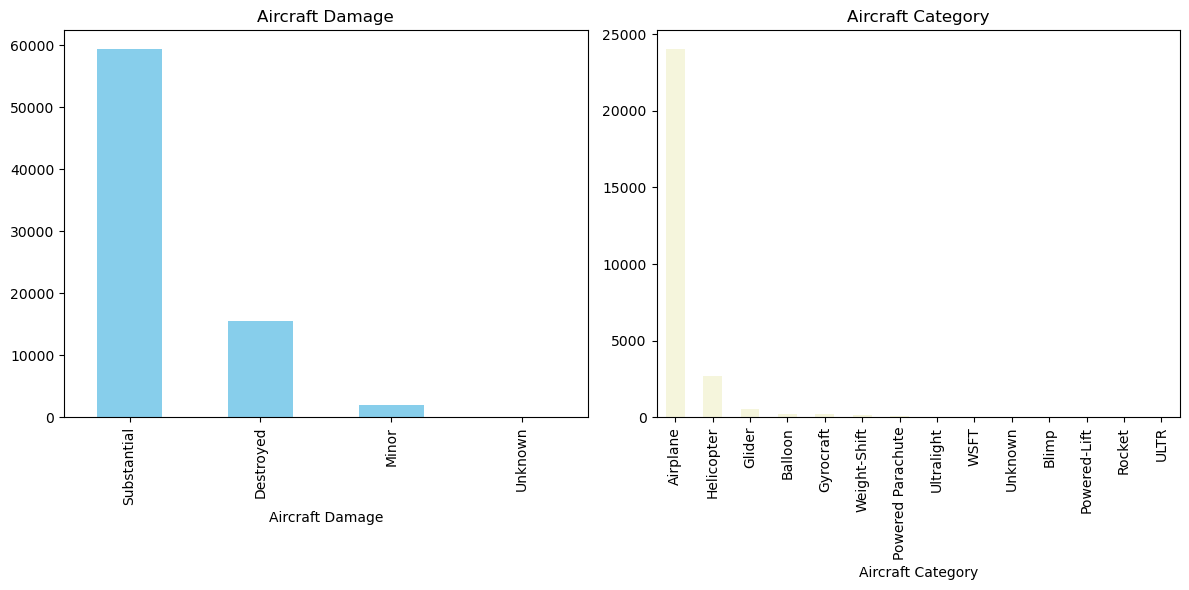

In [81]:
# Bar plots,
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

df['Aircraft Damage'].value_counts().plot(kind='bar',color='skyblue')

plt.title('Aircraft Damage')

plt.subplot(1, 2, 2)

df['Aircraft Category'].value_counts().plot(kind='bar',color='beige')

plt.title('Aircraft Category')

plt.tight_layout()

plt.show();

- Most Aircrafts are substantially damaged after an accident
  
- Commercial Airplanes are likely to cause the most accidents

## Accidents By Various Categories

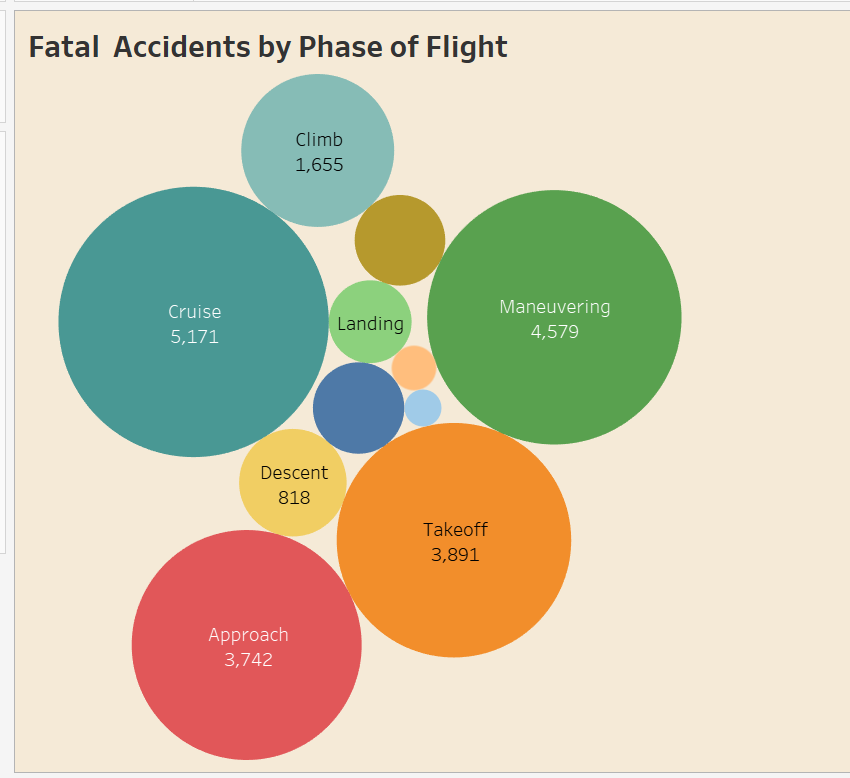

In [82]:
Image(filename=r"C:\\Users\\FLEX 5\\Pictures\\Screenshots\\Fatality counts by Phase of Flight.png", width=800, height=300)

**Cruise Phase**: The highest number of fatal accidents 

**Maneuvering Phase**: The second highest number of fatal accidents 

**Takeoff Phase**: The takeoff phase accounts for `3,891` fatal accidents.
   

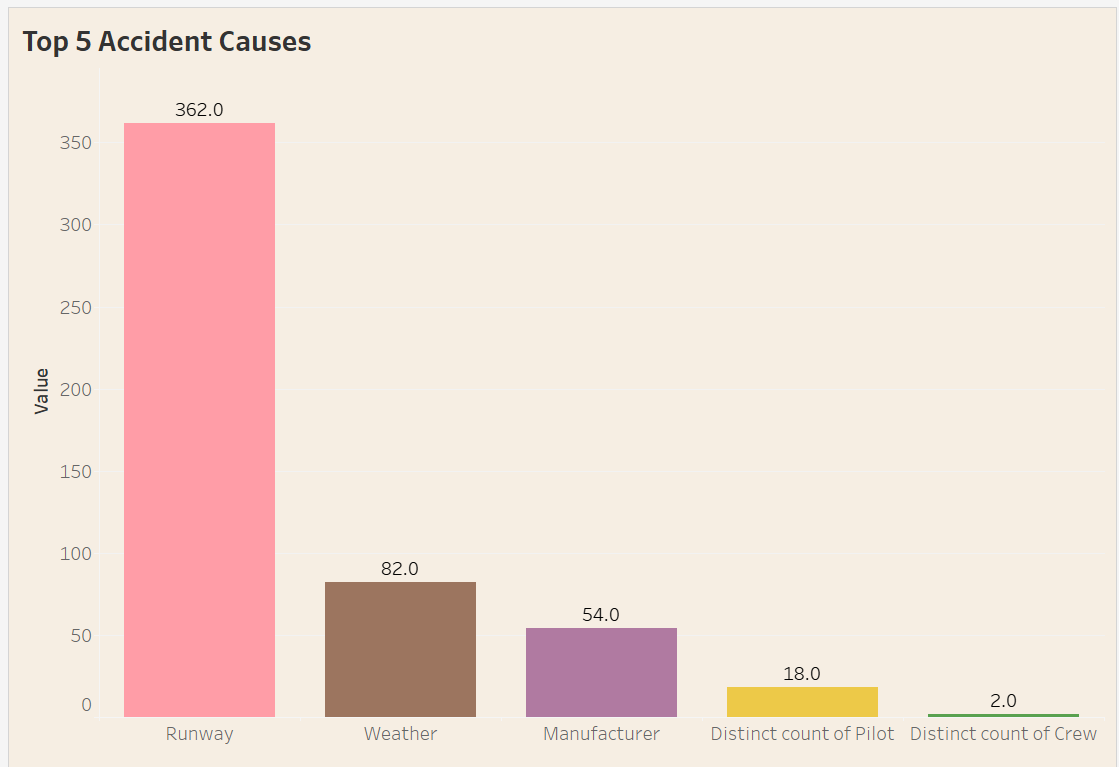

In [83]:
Image(filename=r"C:\\Users\\FLEX 5\\Pictures\\Screenshots\\Screenshot 2024-06-13 145559.png", width=800, height=300)

**Runway**: The most significant cause of accidents, with 362 incidents.

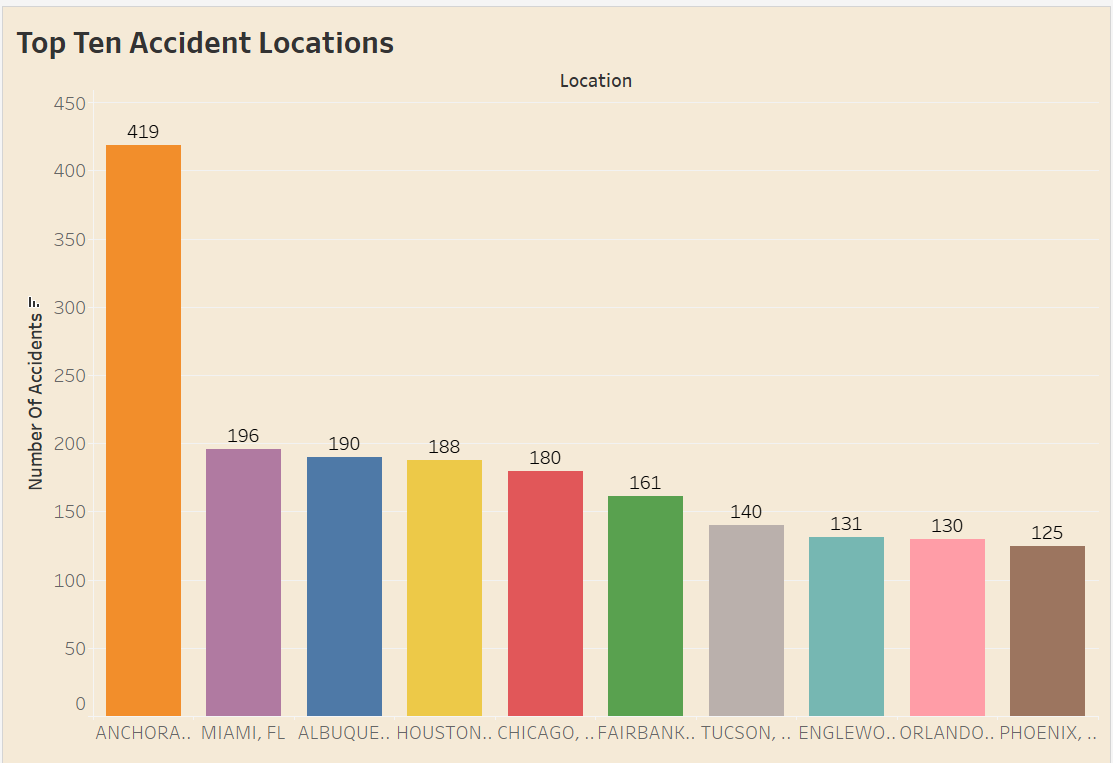

In [84]:
Image(filename=r"C:\\Users\\FLEX 5\\Pictures\\Screenshots\\top Ten Accident Locations.png", width=800, height=300)

**Anchorage, AK**: Highest number of accidents (419).

**Miami, FL**: Second highest (196).

**Albuquerque, NM**: Third highest (190).

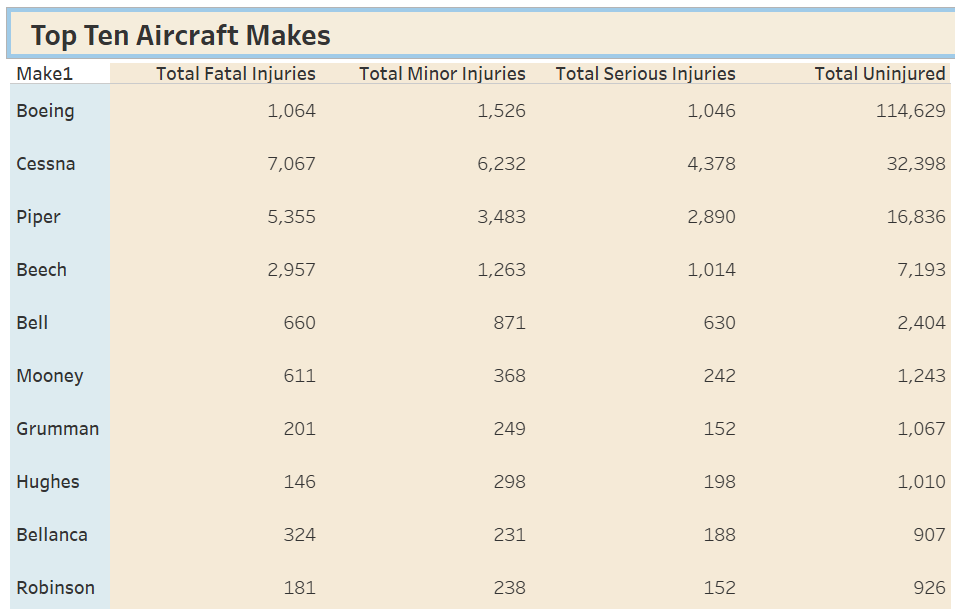

In [85]:
Image(filename=r"C:\\Users\\FLEX 5\\Pictures\\Screenshots\\Top 10 Accident Causing Aircrafts.png", width=800, height=300)

**Cessna**: Highest number of total fatal injuries `7,067` and significant numbers of minor `6,232` and serious injuries `4,378`.

**Boeing**: Causes most accidents ,highest number of total uninjured `114,629` but also notable numbers of fatal `1,064`, minor `1,526`, and serious injuries `1,046`.

**Piper**: High numbers of fatal `5,355`, minor `3,483`, and serious injuries `2,890`.

# Recommendations

**Enhance Safety Measures During Critical Phases**
    
- Given that the cruise, maneuvering, takeoff, and approach phases account for the highest number of fatal accidents, targeted safety initiatives should focus on these critical phases. 
  
**Enhance Safety Measures for Top Aircraft Makes**

- Cessna and Piper: Given the high number of fatal and serious injuries, it is crucial to investigate the specific factors contributing to these accidents.

**Recommendations include:**

- Design Improvements: Enhance the design and safety features of these aircraft models.

- Maintenance Protocols: Implement stricter maintenance protocols to ensure aircraft are in optimal condition.

- Pilot Training: Provide specialized training for pilots operating these aircraft to handle potential issues effectively.

**Address Top Accident Causes**

- Runway Safety: Since runway-related issues are the most significant cause of accidents, focus on,runway Maintenance, Implement and enforce strict safety protocols for runway operations.

**Weather Preparedness**

- Enhance weather forecasting and monitoring systems to provide accurate and timely information to pilots and air traffic controllers.

**Manufacturer Quality Control**
    
- Ensure rigorous quality control and testing procedures for aircraft manufacturers to minimize defects and potential issues.
    
**Targeted Safety Interventions for High-Risk Locations**
    
- Anchorage, AK: Investigate the specific factors contributing to the high accident rate in Anchorage. 
  
**Recommendations include:**
    
- Environmental Factors: Assess and address environmental factors such as weather conditions and terrain.
    
- Other High-Risk Locations: Apply similar investigative and intervention strategies to other high-risk locations such as `Miami`, `Albuquerque` and
`Houston`

"**Data Analysis:**
- Continuously analyze accident data to identify emerging trends and potential risk factors. Use this data to update safety protocols and regulations.
    

# Conclusion

By focusing on these recommendations, the aviation industry can continue to reduce the number of accidents and enhance overall safety, ultimately saving lives and reducing financial losses.